### Rifaccio original step-14 dopo modifiche

   cycle  cells   DoFs     ex POINT err          est err              1/N
0      0     48     72 1.0173365408e-03 7.0238504569e-04 1.3888888889e-02
1      1     45     67 9.6461797386e-04 8.8895251558e-04 1.4925373134e-02
2      2     96    130 4.8542137706e-04 4.5460604483e-04 7.6923076923e-03
3      3    243    307 2.5385861996e-04 2.4125357882e-04 3.2573289902e-03
4      4    618    718 7.9840048551e-05 7.4912028166e-05 1.3927576602e-03
5      5   1485   1665 3.9003807256e-05 3.6911139440e-05 6.0060060060e-04
6      6   3573   3975 1.6281279746e-05 1.5421761683e-05 2.5157232704e-04
7      7   8388   8934 6.6680900150e-06 6.2835870700e-06 1.1193194538e-04
8      8  20739  21799 2.8596349680e-06 2.6640942370e-06 4.5873663930e-05


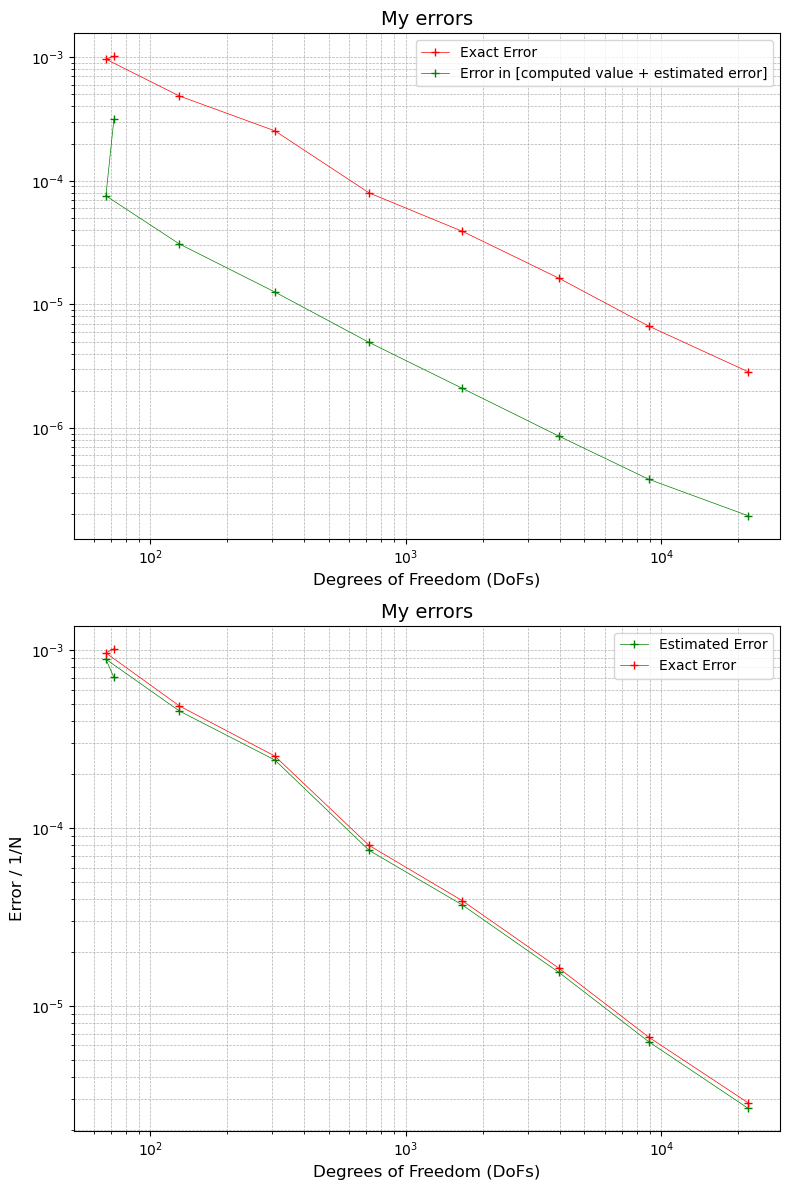

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
file_name = "../results/convergence_results.csv"
EXACT_VALUE = 0.0334473
#EXACT_VALUE = 1.767446e-05    # Ratio 1:100
#EXACT_VALUE = 1.742630e-05     # Ratio 1:99
data = pd.read_csv(file_name)

# Compute 1/N (1/DoFs)
data['1/N'] = 1 / data['DoFs']
pd.options.display.float_format = '{:.10e}'.format  # 10 digits of precision
print(data)

# Create the figure
plt.figure(figsize=(8, 12))  # Adjust the figure size for two plots

# Plot 1: Original log-log plot
plt.subplot(2, 1, 1)  # First subplot (top)
plt.loglog(data['DoFs'], data['ex POINT err'], "r-+", linewidth=0.5, label='Exact Error')
plt.loglog(data['DoFs'], abs(data['ex POINT err']-data["est err"]),"g-+", linewidth=0.5, label='Error in [computed value + estimated error]')
#plt.loglog(data['DoFs'], abs((data['computed_value']+data["est err"])-EXACT_VALUE),"y-+", linewidth=0.5, label='(real) Error in [computed value + estimated error]')
#plt.loglog(data['DoFs'], data['1/N']*0.03, "b:", linewidth=0.5, label='1/N')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.title('My errors', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Plot 2: Duplicate plot
plt.subplot(2, 1, 2)  # Second subplot (bottom)
plt.loglog(data['DoFs'], data['est err'],"g-+", linewidth=0.5, label='Estimated Error')
plt.loglog(data['DoFs'], data['ex POINT err'],"r-+", linewidth=0.5, label='Exact Error')
plt.xlabel('Degrees of Freedom (DoFs)', fontsize=12)
plt.ylabel('Error / 1/N', fontsize=12)
plt.title('My errors', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
